In [77]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../../stackingmodel/')
import TrainingTools
def shuffle(x):
    np.random.seed(0)
    np.random.shuffle(x)
    return x

In [24]:
data_source_template = [
    {"type": "GenericDataSource", "filename": "E:/paper/stackingmodel/amazon/Amazon_initial_50_30_10000.csv", "label_index": -1, "sparsity": True},
    {"type": "GenericDataSource",  "filename": "E:/paper/stackingmodel/others/uci_glass_n/glass.data", "label_index": -1, "drop_cols": [0]}
]

In [25]:
source = TrainingTools.get_source_bytype(data_source_template[1])

In [87]:
etClassifier = ExtraTreesClassifier(n_estimators=1000, max_depth=None, n_jobs=-1, max_features=1, min_samples_split=4, min_samples_leaf=2)

In [88]:
etClassifier.fit(source.X.values, shuffle(np.arange(source.X.shape[0])))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=1, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
encoded_features = etClassifier.apply(source.X.values)

In [90]:
def plot_diff_features(samplesA, samplesB, Y):
    featuresA = TSNE(n_components=2, perplexity=30, init="pca", n_iter=5000, random_state=0).fit_transform(samplesA)
    featuresB = TSNE(n_components=2, perplexity=30, init="pca", n_iter=5000, random_state=0).fit_transform(samplesB)
    scaler = StandardScaler()
    featuresA = scaler.fit_transform(featuresA)
    featuresB = scaler.fit_transform(featuresB)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(featuresA[:, 0], featuresA[:, 1], c=Y)
    plt.title("FeaturesA")
    plt.subplot(1, 2, 2)
    plt.scatter(featuresB[:, 0], featuresB[:, 1], c=Y)
    plt.title("FeaturesB")
    plt.show()

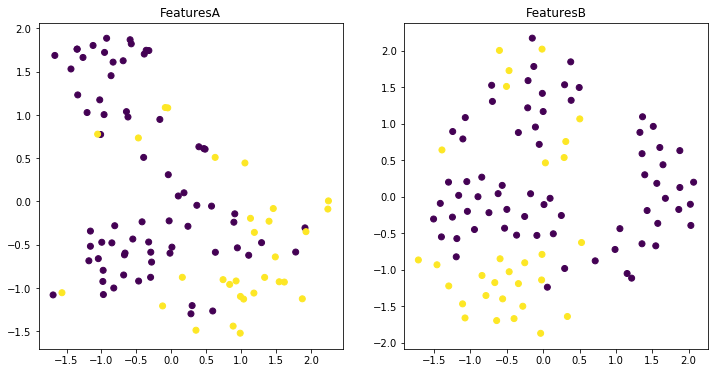

In [91]:
plot_diff_features(source.X.values[:100], encoded_features[:100], source.Y.values[:100])

In [98]:
def rf_model(x, y, tx, ty):
    randomforest = TrainingTools.RandomForestClassifier(**{'n_jobs': -1,'n_estimators': 500,'max_depth': None,'max_features' : 'sqrt','random_state': 0})
    randomforest.fit(x, y)
    rf_preds = randomforest.predict_proba(tx)
    return TrainingTools.precision(rf_preds, ty)

In [99]:
print(rf_model(source.train_x, source.train_y, source.pred_x, source.pred_y))
print(rf_model(etClassifier.apply(source.train_x), source.train_y, etClassifier.apply(source.pred_x), source.pred_y))

0.8307692307692308
0.8307692307692308
